# Testing a PyTorch DNN Model on the Mashable Online News Popularity Dataset

#### This notebook is a quick and gentle introduction to training a Deep Neural Network on the Mashable Online News Popularity Dataset in PyTorch. The DNN architecture used is as follows:
                         


In [1]:
#                           linear1,nn.BatchNorm1d(hiddenLayer1Size),relu,
#                           linear2,dropout,relu,
#                           linear3,dropout,relu,
#                           linear4,dropout,relu,
#                           linear5,dropout,relu,
#                           linear6,dropout,relu,
#                           sigmoid

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
from torch import nn
from torch.autograd import Variable
import sklearn
import sklearn.model_selection
from sklearn.metrics import f1_score,confusion_matrix,accuracy_score, log_loss
import seaborn as sns # data visualization library 

In [3]:
news = pd.read_csv('../input/OnlineNewsPopularityReduced.csv')
X = news.iloc[:,2:-1]
column_names = list(X.columns.values)
N_FEATURES = len(column_names)
y = news.iloc[:,-1]
y = (y > 1400) # a news article is considered popular if it is shared more than 1400 times.
news.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2014/09/28/jobs-tech-workers/,101,12,332,0.528481,1.0,0.645833,6,3,1,...,0.100000,0.7,-0.145833,-0.166667,-0.125000,0.718182,0.137121,0.218182,0.137121,8600
1,http://mashable.com/2014/09/28/obama-says-u-s-...,101,10,393,0.518817,1.0,0.596899,14,1,1,...,0.250000,0.8,-0.312500,-0.500000,-0.250000,0.500000,0.000000,0.000000,0.000000,23700
2,http://mashable.com/2014/09/28/once-upon-a-tim...,101,13,1643,0.388854,1.0,0.546967,29,4,7,...,0.033333,0.8,-0.227778,-0.800000,-0.050000,0.000000,0.000000,0.500000,0.000000,8400
3,http://mashable.com/2014/09/28/the-simpsons-de...,101,9,272,0.488889,1.0,0.512690,2,2,11,...,0.100000,1.0,-0.416667,-1.000000,-0.166667,0.000000,0.000000,0.500000,0.000000,4800
4,http://mashable.com/2014/09/28/viola-davis-les...,101,12,0,0.000000,0.0,0.000000,0,0,0,...,0.000000,0.0,0.000000,0.000000,0.000000,0.541071,0.067560,0.041071,0.067560,3100


split the dataset into a training and test set

In [4]:
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, random_state=42, test_size=0.3)

transform the training and test data from numpy arrays to Tensors, so that PyTorch can use the data

In [5]:
def xNumpyToTensor(array):
    array = np.array(array, dtype=np.float32) 
    return Variable(torch.from_numpy(array)).type(torch.FloatTensor)

def yNumpyToTensor(array):
    array = np.array(array.astype(int))
    return Variable(torch.from_numpy(array)).type(torch.FloatTensor)

x_tensor_train = xNumpyToTensor(x_train)
y_tensor_train = yNumpyToTensor(y_train)
x_tensor_test = xNumpyToTensor(x_test)
y_tensor_test = yNumpyToTensor(y_test)

/opt/conda/lib/python3.6/site-packages/torch/nn/modules/loss.py:498: UserWarning: Using a target size (torch.Size([3467])) that is different to the input size (torch.Size([3467, 1])) is deprecated. Please ensure they have the same size.
  return F.binary_cross_entropy(input, target, weight=self.weight, reduction=self.reduction)


0 0.69565886
LOG_LOSS=0.6943743758820493 


/opt/conda/lib/python3.6/site-packages/torch/nn/modules/loss.py:498: UserWarning: Using a target size (torch.Size([3467])) that is different to the input size (torch.Size([3467, 1])) is deprecated. Please ensure they have the same size.
  return F.binary_cross_entropy(input, target, weight=self.weight, reduction=self.reduction)


5 0.6939013
LOG_LOSS=0.6925575932401414 


/opt/conda/lib/python3.6/site-packages/torch/nn/modules/loss.py:498: UserWarning: Using a target size (torch.Size([3467])) that is different to the input size (torch.Size([3467, 1])) is deprecated. Please ensure they have the same size.
  return F.binary_cross_entropy(input, target, weight=self.weight, reduction=self.reduction)


10 0.69247633
LOG_LOSS=0.6928024335683555 


/opt/conda/lib/python3.6/site-packages/torch/nn/modules/loss.py:498: UserWarning: Using a target size (torch.Size([3467])) that is different to the input size (torch.Size([3467, 1])) is deprecated. Please ensure they have the same size.
  return F.binary_cross_entropy(input, target, weight=self.weight, reduction=self.reduction)


15 0.6922843
LOG_LOSS=0.6916803227788904 


/opt/conda/lib/python3.6/site-packages/torch/nn/modules/loss.py:498: UserWarning: Using a target size (torch.Size([3467])) that is different to the input size (torch.Size([3467, 1])) is deprecated. Please ensure they have the same size.
  return F.binary_cross_entropy(input, target, weight=self.weight, reduction=self.reduction)


20 0.69204706
LOG_LOSS=0.691879963906884 


/opt/conda/lib/python3.6/site-packages/torch/nn/modules/loss.py:498: UserWarning: Using a target size (torch.Size([3467])) that is different to the input size (torch.Size([3467, 1])) is deprecated. Please ensure they have the same size.
  return F.binary_cross_entropy(input, target, weight=self.weight, reduction=self.reduction)


25 0.6917722
LOG_LOSS=0.691858828869456 


/opt/conda/lib/python3.6/site-packages/torch/nn/modules/loss.py:498: UserWarning: Using a target size (torch.Size([3467])) that is different to the input size (torch.Size([3467, 1])) is deprecated. Please ensure they have the same size.
  return F.binary_cross_entropy(input, target, weight=self.weight, reduction=self.reduction)


30 0.69184846
LOG_LOSS=0.6913759938886523 


/opt/conda/lib/python3.6/site-packages/torch/nn/modules/loss.py:498: UserWarning: Using a target size (torch.Size([3467])) that is different to the input size (torch.Size([3467, 1])) is deprecated. Please ensure they have the same size.
  return F.binary_cross_entropy(input, target, weight=self.weight, reduction=self.reduction)


35 0.69083494
LOG_LOSS=0.6912848947027344 


/opt/conda/lib/python3.6/site-packages/torch/nn/modules/loss.py:498: UserWarning: Using a target size (torch.Size([3467])) that is different to the input size (torch.Size([3467, 1])) is deprecated. Please ensure they have the same size.
  return F.binary_cross_entropy(input, target, weight=self.weight, reduction=self.reduction)


40 0.6909798
LOG_LOSS=0.6906590284159622 


/opt/conda/lib/python3.6/site-packages/torch/nn/modules/loss.py:498: UserWarning: Using a target size (torch.Size([3467])) that is different to the input size (torch.Size([3467, 1])) is deprecated. Please ensure they have the same size.
  return F.binary_cross_entropy(input, target, weight=self.weight, reduction=self.reduction)


45 0.69105375
LOG_LOSS=0.6908326245388411 


/opt/conda/lib/python3.6/site-packages/torch/nn/modules/loss.py:498: UserWarning: Using a target size (torch.Size([3467])) that is different to the input size (torch.Size([3467, 1])) is deprecated. Please ensure they have the same size.
  return F.binary_cross_entropy(input, target, weight=self.weight, reduction=self.reduction)


50 0.69060344
LOG_LOSS=0.6905403084897642 


/opt/conda/lib/python3.6/site-packages/torch/nn/modules/loss.py:498: UserWarning: Using a target size (torch.Size([3467])) that is different to the input size (torch.Size([3467, 1])) is deprecated. Please ensure they have the same size.
  return F.binary_cross_entropy(input, target, weight=self.weight, reduction=self.reduction)


55 0.6913271
LOG_LOSS=0.6912137008627229 


/opt/conda/lib/python3.6/site-packages/torch/nn/modules/loss.py:498: UserWarning: Using a target size (torch.Size([3467])) that is different to the input size (torch.Size([3467, 1])) is deprecated. Please ensure they have the same size.
  return F.binary_cross_entropy(input, target, weight=self.weight, reduction=self.reduction)


60 0.6905461
LOG_LOSS=0.6909270923492006 


/opt/conda/lib/python3.6/site-packages/torch/nn/modules/loss.py:498: UserWarning: Using a target size (torch.Size([3467])) that is different to the input size (torch.Size([3467, 1])) is deprecated. Please ensure they have the same size.
  return F.binary_cross_entropy(input, target, weight=self.weight, reduction=self.reduction)


65 0.690446
LOG_LOSS=0.6913127892155253 


/opt/conda/lib/python3.6/site-packages/torch/nn/modules/loss.py:498: UserWarning: Using a target size (torch.Size([3467])) that is different to the input size (torch.Size([3467, 1])) is deprecated. Please ensure they have the same size.
  return F.binary_cross_entropy(input, target, weight=self.weight, reduction=self.reduction)


70 0.6905082
LOG_LOSS=0.6902491766971955 


/opt/conda/lib/python3.6/site-packages/torch/nn/modules/loss.py:498: UserWarning: Using a target size (torch.Size([3467])) that is different to the input size (torch.Size([3467, 1])) is deprecated. Please ensure they have the same size.
  return F.binary_cross_entropy(input, target, weight=self.weight, reduction=self.reduction)


75 0.6901002
LOG_LOSS=0.6901039528261517 


/opt/conda/lib/python3.6/site-packages/torch/nn/modules/loss.py:498: UserWarning: Using a target size (torch.Size([3467])) that is different to the input size (torch.Size([3467, 1])) is deprecated. Please ensure they have the same size.
  return F.binary_cross_entropy(input, target, weight=self.weight, reduction=self.reduction)


80 0.6898571
LOG_LOSS=0.6903472555990418 


/opt/conda/lib/python3.6/site-packages/torch/nn/modules/loss.py:498: UserWarning: Using a target size (torch.Size([3467])) that is different to the input size (torch.Size([3467, 1])) is deprecated. Please ensure they have the same size.
  return F.binary_cross_entropy(input, target, weight=self.weight, reduction=self.reduction)


85 0.68949187
LOG_LOSS=0.6902385198717239 


/opt/conda/lib/python3.6/site-packages/torch/nn/modules/loss.py:498: UserWarning: Using a target size (torch.Size([3467])) that is different to the input size (torch.Size([3467, 1])) is deprecated. Please ensure they have the same size.
  return F.binary_cross_entropy(input, target, weight=self.weight, reduction=self.reduction)


90 0.68860084
LOG_LOSS=0.688359621303468 


/opt/conda/lib/python3.6/site-packages/torch/nn/modules/loss.py:498: UserWarning: Using a target size (torch.Size([3467])) that is different to the input size (torch.Size([3467, 1])) is deprecated. Please ensure they have the same size.
  return F.binary_cross_entropy(input, target, weight=self.weight, reduction=self.reduction)


95 0.6884801
LOG_LOSS=0.6868939831660009 


/opt/conda/lib/python3.6/site-packages/torch/nn/modules/loss.py:498: UserWarning: Using a target size (torch.Size([3467])) that is different to the input size (torch.Size([3467, 1])) is deprecated. Please ensure they have the same size.
  return F.binary_cross_entropy(input, target, weight=self.weight, reduction=self.reduction)


100 0.68676597
LOG_LOSS=0.686821784494694 


/opt/conda/lib/python3.6/site-packages/torch/nn/modules/loss.py:498: UserWarning: Using a target size (torch.Size([3467])) that is different to the input size (torch.Size([3467, 1])) is deprecated. Please ensure they have the same size.
  return F.binary_cross_entropy(input, target, weight=self.weight, reduction=self.reduction)


105 0.6835651
LOG_LOSS=0.6826800021650451 


/opt/conda/lib/python3.6/site-packages/torch/nn/modules/loss.py:498: UserWarning: Using a target size (torch.Size([3467])) that is different to the input size (torch.Size([3467, 1])) is deprecated. Please ensure they have the same size.
  return F.binary_cross_entropy(input, target, weight=self.weight, reduction=self.reduction)


110 0.6827401
LOG_LOSS=0.6821532613552715 


/opt/conda/lib/python3.6/site-packages/torch/nn/modules/loss.py:498: UserWarning: Using a target size (torch.Size([3467])) that is different to the input size (torch.Size([3467, 1])) is deprecated. Please ensure they have the same size.
  return F.binary_cross_entropy(input, target, weight=self.weight, reduction=self.reduction)


115 0.678704
LOG_LOSS=0.6811851723349472 


/opt/conda/lib/python3.6/site-packages/torch/nn/modules/loss.py:498: UserWarning: Using a target size (torch.Size([3467])) that is different to the input size (torch.Size([3467, 1])) is deprecated. Please ensure they have the same size.
  return F.binary_cross_entropy(input, target, weight=self.weight, reduction=self.reduction)


120 0.67622995
LOG_LOSS=0.6788209183968783 


/opt/conda/lib/python3.6/site-packages/torch/nn/modules/loss.py:498: UserWarning: Using a target size (torch.Size([3467])) that is different to the input size (torch.Size([3467, 1])) is deprecated. Please ensure they have the same size.
  return F.binary_cross_entropy(input, target, weight=self.weight, reduction=self.reduction)


125 0.6737005
LOG_LOSS=0.6772544200570889 


/opt/conda/lib/python3.6/site-packages/torch/nn/modules/loss.py:498: UserWarning: Using a target size (torch.Size([3467])) that is different to the input size (torch.Size([3467, 1])) is deprecated. Please ensure they have the same size.
  return F.binary_cross_entropy(input, target, weight=self.weight, reduction=self.reduction)


130 0.6722367
LOG_LOSS=0.6798578443127188 


/opt/conda/lib/python3.6/site-packages/torch/nn/modules/loss.py:498: UserWarning: Using a target size (torch.Size([3467])) that is different to the input size (torch.Size([3467, 1])) is deprecated. Please ensure they have the same size.
  return F.binary_cross_entropy(input, target, weight=self.weight, reduction=self.reduction)


135 0.6712559
LOG_LOSS=0.6788146889829763 


/opt/conda/lib/python3.6/site-packages/torch/nn/modules/loss.py:498: UserWarning: Using a target size (torch.Size([3467])) that is different to the input size (torch.Size([3467, 1])) is deprecated. Please ensure they have the same size.
  return F.binary_cross_entropy(input, target, weight=self.weight, reduction=self.reduction)


140 0.6728577
LOG_LOSS=0.6785819488248732 


/opt/conda/lib/python3.6/site-packages/torch/nn/modules/loss.py:498: UserWarning: Using a target size (torch.Size([3467])) that is different to the input size (torch.Size([3467, 1])) is deprecated. Please ensure they have the same size.
  return F.binary_cross_entropy(input, target, weight=self.weight, reduction=self.reduction)


145 0.6727771
LOG_LOSS=0.6791712656922805 


/opt/conda/lib/python3.6/site-packages/torch/nn/modules/loss.py:498: UserWarning: Using a target size (torch.Size([3467])) that is different to the input size (torch.Size([3467, 1])) is deprecated. Please ensure they have the same size.
  return F.binary_cross_entropy(input, target, weight=self.weight, reduction=self.reduction)


150 0.67268896
LOG_LOSS=0.6768637983553737 


/opt/conda/lib/python3.6/site-packages/torch/nn/modules/loss.py:498: UserWarning: Using a target size (torch.Size([3467])) that is different to the input size (torch.Size([3467, 1])) is deprecated. Please ensure they have the same size.
  return F.binary_cross_entropy(input, target, weight=self.weight, reduction=self.reduction)


155 0.6733013
LOG_LOSS=0.6756902809362278 


/opt/conda/lib/python3.6/site-packages/torch/nn/modules/loss.py:498: UserWarning: Using a target size (torch.Size([3467])) that is different to the input size (torch.Size([3467, 1])) is deprecated. Please ensure they have the same size.
  return F.binary_cross_entropy(input, target, weight=self.weight, reduction=self.reduction)


160 0.6683794
LOG_LOSS=nan 


/opt/conda/lib/python3.6/site-packages/sklearn/metrics/_classification.py:2295: RuntimeWarning: divide by zero encountered in log
  loss = -(transformed_labels * np.log(y_pred)).sum(axis=1)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/_classification.py:2295: RuntimeWarning: invalid value encountered in multiply
  loss = -(transformed_labels * np.log(y_pred)).sum(axis=1)
/opt/conda/lib/python3.6/site-packages/torch/nn/modules/loss.py:498: UserWarning: Using a target size (torch.Size([3467])) that is different to the input size (torch.Size([3467, 1])) is deprecated. Please ensure they have the same size.
  return F.binary_cross_entropy(input, target, weight=self.weight, reduction=self.reduction)


165 0.6707505
LOG_LOSS=nan 


/opt/conda/lib/python3.6/site-packages/sklearn/metrics/_classification.py:2295: RuntimeWarning: divide by zero encountered in log
  loss = -(transformed_labels * np.log(y_pred)).sum(axis=1)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/_classification.py:2295: RuntimeWarning: invalid value encountered in multiply
  loss = -(transformed_labels * np.log(y_pred)).sum(axis=1)
/opt/conda/lib/python3.6/site-packages/torch/nn/modules/loss.py:498: UserWarning: Using a target size (torch.Size([3467])) that is different to the input size (torch.Size([3467, 1])) is deprecated. Please ensure they have the same size.
  return F.binary_cross_entropy(input, target, weight=self.weight, reduction=self.reduction)


170 0.6699338
LOG_LOSS=0.6757205205981432 


/opt/conda/lib/python3.6/site-packages/torch/nn/modules/loss.py:498: UserWarning: Using a target size (torch.Size([3467])) that is different to the input size (torch.Size([3467, 1])) is deprecated. Please ensure they have the same size.
  return F.binary_cross_entropy(input, target, weight=self.weight, reduction=self.reduction)


175 0.6689695
LOG_LOSS=nan 


/opt/conda/lib/python3.6/site-packages/sklearn/metrics/_classification.py:2295: RuntimeWarning: divide by zero encountered in log
  loss = -(transformed_labels * np.log(y_pred)).sum(axis=1)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/_classification.py:2295: RuntimeWarning: invalid value encountered in multiply
  loss = -(transformed_labels * np.log(y_pred)).sum(axis=1)
/opt/conda/lib/python3.6/site-packages/torch/nn/modules/loss.py:498: UserWarning: Using a target size (torch.Size([3467])) that is different to the input size (torch.Size([3467, 1])) is deprecated. Please ensure they have the same size.
  return F.binary_cross_entropy(input, target, weight=self.weight, reduction=self.reduction)


180 0.6680289
LOG_LOSS=nan 


/opt/conda/lib/python3.6/site-packages/sklearn/metrics/_classification.py:2295: RuntimeWarning: divide by zero encountered in log
  loss = -(transformed_labels * np.log(y_pred)).sum(axis=1)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/_classification.py:2295: RuntimeWarning: invalid value encountered in multiply
  loss = -(transformed_labels * np.log(y_pred)).sum(axis=1)
/opt/conda/lib/python3.6/site-packages/torch/nn/modules/loss.py:498: UserWarning: Using a target size (torch.Size([3467])) that is different to the input size (torch.Size([3467, 1])) is deprecated. Please ensure they have the same size.
  return F.binary_cross_entropy(input, target, weight=self.weight, reduction=self.reduction)


185 0.6676581
LOG_LOSS=nan 


/opt/conda/lib/python3.6/site-packages/sklearn/metrics/_classification.py:2295: RuntimeWarning: divide by zero encountered in log
  loss = -(transformed_labels * np.log(y_pred)).sum(axis=1)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/_classification.py:2295: RuntimeWarning: invalid value encountered in multiply
  loss = -(transformed_labels * np.log(y_pred)).sum(axis=1)
/opt/conda/lib/python3.6/site-packages/torch/nn/modules/loss.py:498: UserWarning: Using a target size (torch.Size([3467])) that is different to the input size (torch.Size([3467, 1])) is deprecated. Please ensure they have the same size.
  return F.binary_cross_entropy(input, target, weight=self.weight, reduction=self.reduction)


190 0.66688555
LOG_LOSS=0.6764339675353972 


/opt/conda/lib/python3.6/site-packages/torch/nn/modules/loss.py:498: UserWarning: Using a target size (torch.Size([3467])) that is different to the input size (torch.Size([3467, 1])) is deprecated. Please ensure they have the same size.
  return F.binary_cross_entropy(input, target, weight=self.weight, reduction=self.reduction)


195 0.6679738
LOG_LOSS=nan 


/opt/conda/lib/python3.6/site-packages/sklearn/metrics/_classification.py:2295: RuntimeWarning: divide by zero encountered in log
  loss = -(transformed_labels * np.log(y_pred)).sum(axis=1)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/_classification.py:2295: RuntimeWarning: invalid value encountered in multiply
  loss = -(transformed_labels * np.log(y_pred)).sum(axis=1)
/opt/conda/lib/python3.6/site-packages/torch/nn/modules/loss.py:498: UserWarning: Using a target size (torch.Size([3467])) that is different to the input size (torch.Size([3467, 1])) is deprecated. Please ensure they have the same size.
  return F.binary_cross_entropy(input, target, weight=self.weight, reduction=self.reduction)


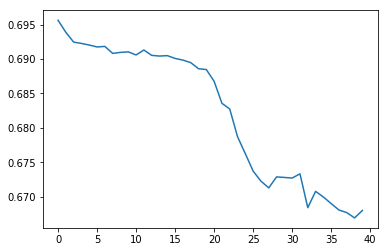

f1 score 0.5478806907378336
accuracy 0.6126429051782112


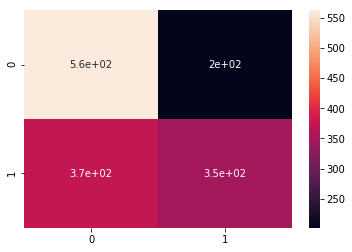

In [6]:
# Neural Network parameters
DROPOUT_PROB = 0.9

LR = 0.001
MOMENTUM= 0.99
dropout = torch.nn.Dropout(p=1 - (DROPOUT_PROB))

hiddenLayer1Size=512
hiddenLayer2Size=int(hiddenLayer1Size/4)
hiddenLayer3Size=int(hiddenLayer1Size/8)
hiddenLayer4Size=int(hiddenLayer1Size/16)
hiddenLayer5Size=int(hiddenLayer1Size/32)

#Neural Network layers
linear1=torch.nn.Linear(N_FEATURES, hiddenLayer1Size, bias=True) 
linear2=torch.nn.Linear(hiddenLayer1Size, hiddenLayer2Size)
linear3=torch.nn.Linear(hiddenLayer2Size, hiddenLayer3Size)
linear4=torch.nn.Linear(hiddenLayer3Size, hiddenLayer4Size)
linear5=torch.nn.Linear(hiddenLayer4Size, hiddenLayer5Size)
linear6=torch.nn.Linear(hiddenLayer5Size, 1)
sigmoid = torch.nn.Sigmoid()
threshold = nn.Threshold(0.5, 0)
tanh=torch.nn.Tanh()
relu=torch.nn.LeakyReLU()

#Neural network architecture
net = torch.nn.Sequential(linear1,nn.BatchNorm1d(hiddenLayer1Size),relu,
                          linear2,dropout,relu,
                          linear3,dropout,relu,
                          linear4,dropout,relu,
                          linear5,dropout,relu,
                          linear6,dropout,relu,
                          sigmoid
                          )

optimizer = torch.optim.Adam(net.parameters(), lr=LR,weight_decay=5e-3)
loss_func=torch.nn.BCELoss()
epochs = 200
all_losses = []

#Training in batches
for step in range(epochs):    
    out = net(x_tensor_train)                 # input x and predict based on x
    cost = loss_func(out, y_tensor_train) 
    optimizer.zero_grad()   # clear gradients for next train
    cost.backward()         # backpropagation, compute gradients
    optimizer.step()        # apply gradients 
        
    if step % 5 == 0:        
        loss = cost.data
        all_losses.append(loss)
        print(step, cost.data.cpu().numpy())
        # RuntimeError: can't convert CUDA tensor to numpy (it doesn't support GPU arrays). 
        # Use .cpu() to move the tensor to host memory first.        
        prediction = (net(x_tensor_test).data).float() # probabilities         
#         prediction = (net(X_tensor).data > 0.5).float() # zero or one
#         print ("Pred:" + str (prediction)) # Pred:Variable containing: 0 or 1
#         pred_y = prediction.data.numpy().squeeze()            
        pred_y = prediction.cpu().numpy().squeeze()
        target_y = y_tensor_test.cpu().data.numpy()
        print ('LOG_LOSS={} '.format(log_loss(target_y, pred_y))) 

#Evaluating the performance of the model
%matplotlib inline
plt.plot(all_losses)
plt.show()
pred_y = pred_y > 0.5
print('f1 score', f1_score(target_y, pred_y))
print('accuracy',accuracy_score(target_y, pred_y))
cm = confusion_matrix(target_y, pred_y)
sns.heatmap(cm, annot=True)

This model achieved a F1 score of ~.567 and accuracy of ~.62
Not bad! I'll spare the details of hyperparameter tuning and cross-validation for another notebook, but I hope this gives you a nice introduction to how to use PyTorch DNN on a dataset in a Kaggle Kernel! Hope you can apply this model to your own dataset! 😄